#### Adicionando o caminho do projeto ao path

In [16]:
import os
os.chdir('/Users/edithvidal/Documents/Github/data_science_analysis/')

#### Importando as bibliotecas necessárias para iniciar a leitura dos arquivos

In [50]:
%pip install missingno
%pip install requests
%matplotlib inline

import numpy as np
import pandas as pd
import missingno as msno
import requests
import json
import matplotlib.pyplot as plt


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


#### Lendo os dados da base única de 2018 a 2024

In [18]:
df_accidents = pd.read_csv(
    "acquisition/datatran2018_2024_v0.csv"
)
df_accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436718 entries, 0 to 436717
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      436718 non-null  float64
 1   data_inversa            436718 non-null  object 
 2   dia_semana              436718 non-null  object 
 3   horario                 436718 non-null  object 
 4   uf                      436718 non-null  object 
 5   br                      436267 non-null  float64
 6   km                      436267 non-null  object 
 7   causa_acidente          436718 non-null  object 
 8   tipo_acidente           436718 non-null  object 
 9   classificacao_acidente  436715 non-null  object 
 10  fase_dia                436718 non-null  object 
 11  sentido_via             436718 non-null  object 
 12  condicao_metereologica  436718 non-null  object 
 13  tipo_pista              436718 non-null  object 
 14  tracado_via         

#### Verificando os dados faltantes de cada coluna para ter uma visão geral da base

<Axes: >

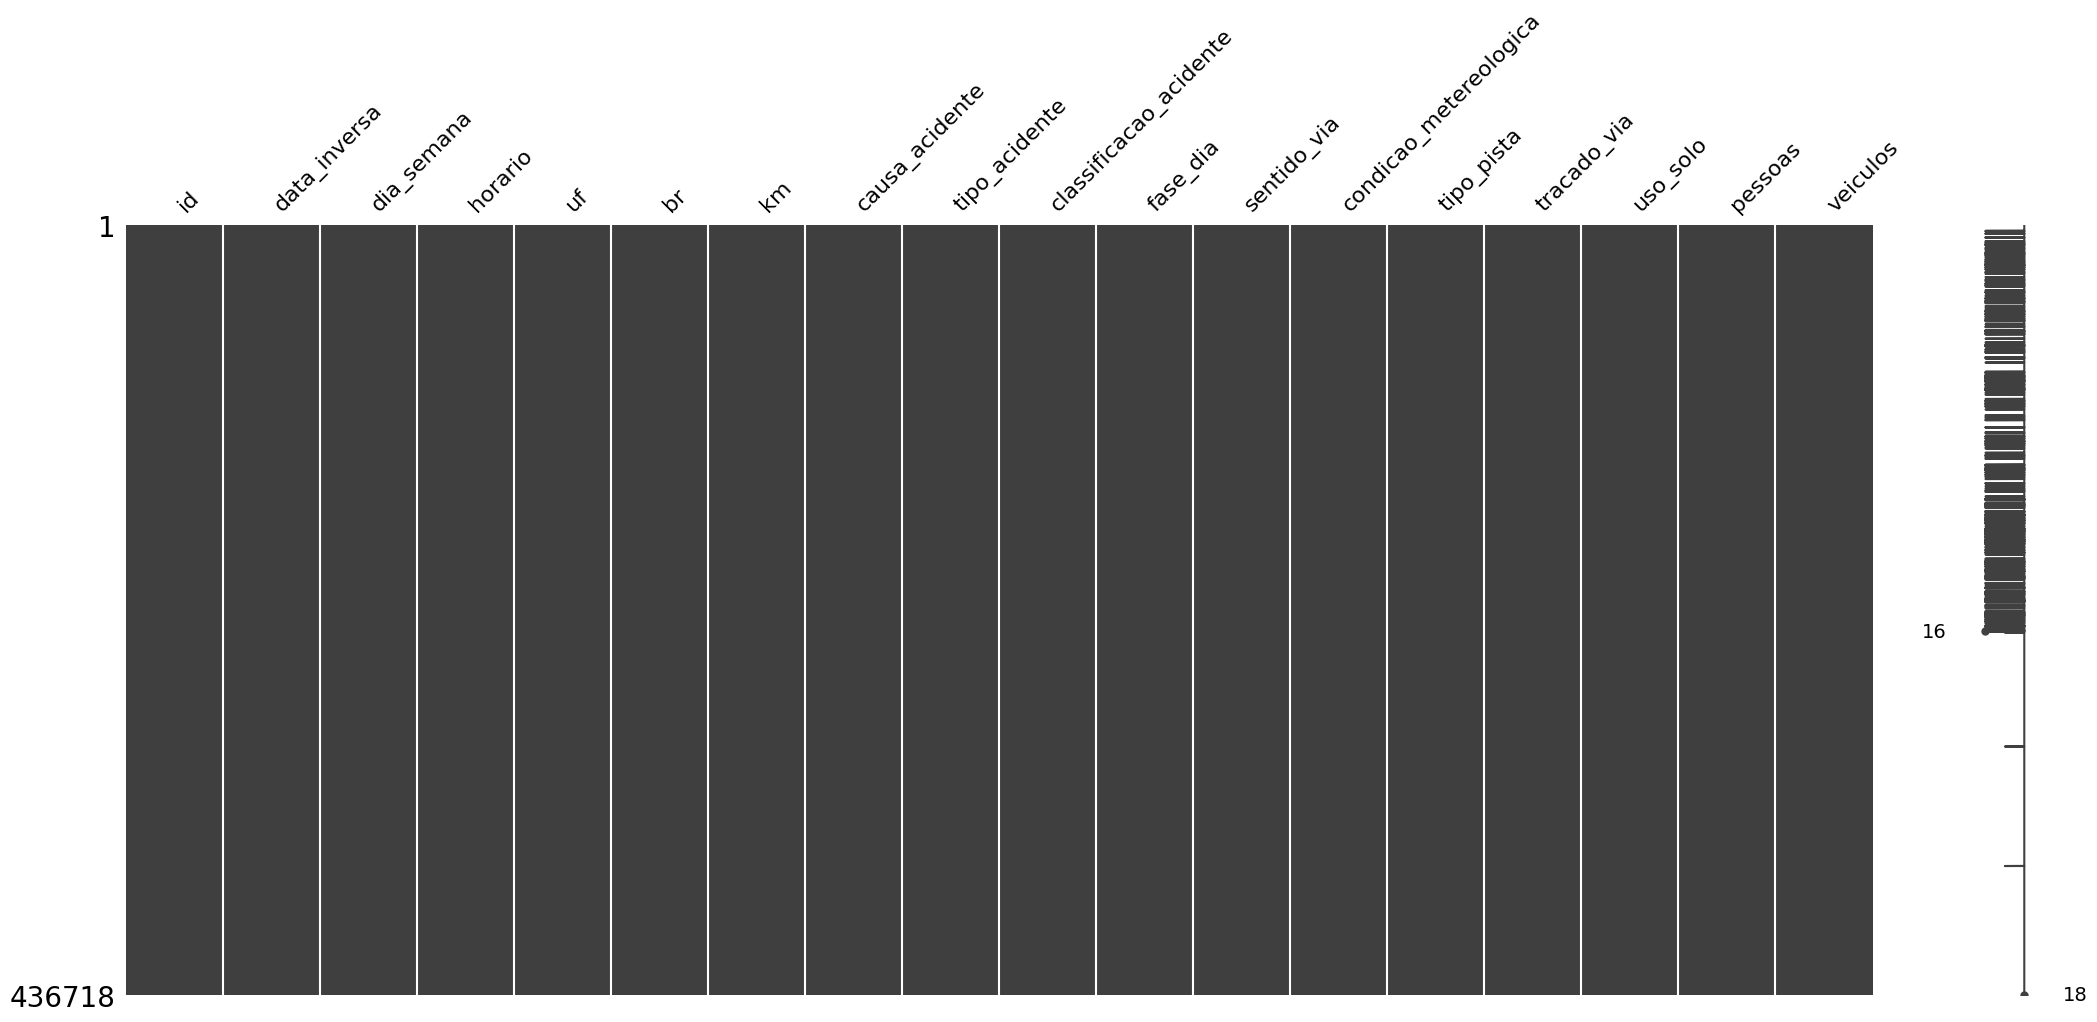

In [4]:
msno.matrix(df=df_accidents)

#### Criando funções auxiliares para tratar o dataframe

In [4]:
def capitalize(df):
    return df.apply(lambda data: data.capitalize())

#### Verificando informações da coluna "br" para identificar dados faltantes

In [6]:
df_accidents["br"].info(verbose=True,)

<class 'pandas.core.series.Series'>
RangeIndex: 436718 entries, 0 to 436717
Series name: br
Non-Null Count   Dtype  
--------------   -----  
436267 non-null  float64
dtypes: float64(1)
memory usage: 3.3 MB


#### Verificando dados estatísticos da coluna "br"para avaliar a necessidade de tratamento dos dados

In [7]:
df_accidents["br"].describe()

count    436267.000000
mean        212.121939
std         130.577461
min           0.000000
25%         101.000000
50%         158.000000
75%         324.000000
max         498.000000
Name: br, dtype: float64

#### Verificando dados faltantes na coluna "br" para avaliar a necessidade de tratamento dos dados

In [20]:
df_accidents["br"].isna().value_counts()

br
False    436267
True        451
Name: count, dtype: int64

#### Tratando os dados para serem do tipo string e tratando dados faltantes como "Desconhecido" na coluna "br"

In [38]:
def get_condition():
    return df_accidents[df_accidents['br'].isna() | df_accidents['br'] == 0]


df_accidents.drop(get_condition().index, inplace=True)
df_accidents['br'].isna().value_counts()

br
False    435722
Name: count, dtype: int64

#### Verificando dados estatísticos da coluna "br" após o tratamento dos dados

In [39]:
df_accidents["br"].value_counts().head()

br
101.0    73787
116.0    65465
381.0    21030
40.0     20747
153.0    16902
Name: count, dtype: int64

#### Verificando informações da coluna "km" para identificar dados faltantes

In [40]:
df_accidents["km"].info()

<class 'pandas.core.series.Series'>
Index: 435722 entries, 0 to 436717
Series name: km
Non-Null Count   Dtype 
--------------   ----- 
435722 non-null  object
dtypes: object(1)
memory usage: 6.6+ MB


#### Verificando dados estatísticos da coluna "km"para avaliar a necessidade de tratamento dos dados

In [41]:
df_accidents["km"].describe()

count     435722
unique      9740
top            1
freq        1911
Name: km, dtype: object

#### Verificando dados faltantes na coluna "km" para avaliar a necessidade de tratamento dos dados

In [42]:
df_accidents["km"].isna().value_counts()

km
False    435722
Name: count, dtype: int64

#### Verificando dados estatísticos da coluna "km" após o tratamento dos dados

In [57]:
df_accidents["km"].describe()

count     435722
unique      9740
top            1
freq        1911
Name: km, dtype: object

#### Agrupando os dados por br e km para identificar a quais rodovias pertencem os kms com mais acidentes

        km     br  frequência
27690  219  116.0         377
25560  206  101.0         301
25703  207  101.0         292
29760  230  116.0         289
29218  228  116.0         274


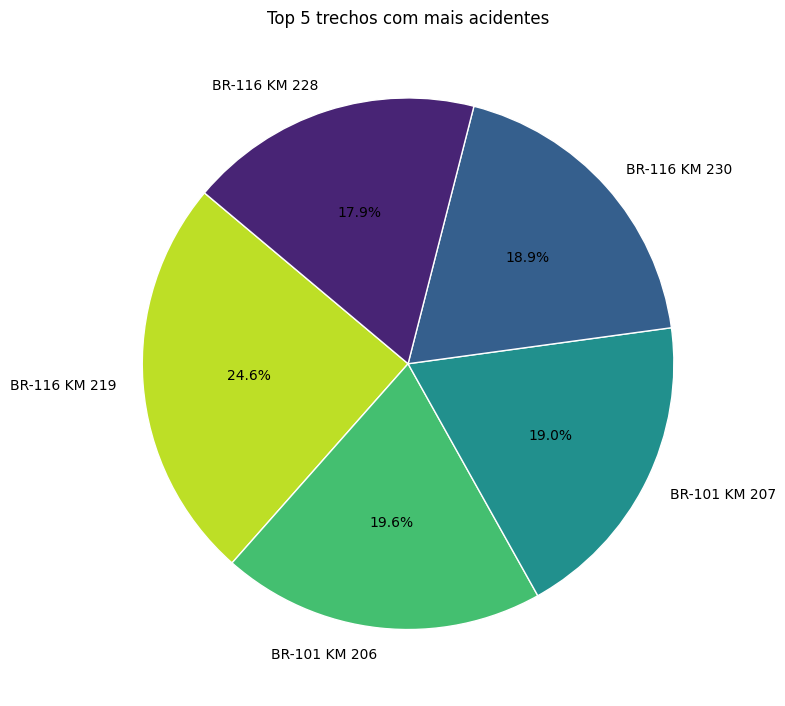

In [56]:
df = df_accidents.copy()
df = df.groupby(["km", "br"]).size().reset_index(
    name="frequência").sort_values("frequência", ascending=False).head(5)
print(df)

plt.figure(figsize=(8, 8))
plt.pie(
    df["frequência"],
    labels = df.apply(lambda row: f'BR-{int(row["br"])} KM {int(row["km"])}', axis=1),
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.viridis_r([0.1, 0.3, 0.5, 0.7, 0.9]),
    wedgeprops={'edgecolor': 'white'}
)

plt.title("Top 5 trechos com mais acidentes")
plt.tight_layout()
plt.show()

#### Verificando informações da coluna "data_inversa"

In [15]:
df_accidents["data_inversa"].info()

<class 'pandas.core.series.Series'>
Index: 436267 entries, 0 to 436717
Series name: data_inversa
Non-Null Count   Dtype 
--------------   ----- 
436267 non-null  object
dtypes: object(1)
memory usage: 6.7+ MB


#### Verificando dados estatísticos da coluna "data_inversa"para avaliar a necessidade de tratamento dos dados

In [10]:
df_accidents["data_inversa"].value_counts()


data_inversa
2018-02-10    325
2018-12-22    325
2024-12-21    319
2018-02-09    313
2023-12-23    303
             ... 
2018-05-26     83
2020-03-26     77
2018-05-29     75
2020-03-25     72
2020-03-23     70
Name: count, Length: 2373, dtype: int64

In [16]:
df_accidents["data_inversa"].describe()

count         436267
unique          2373
top       2018-02-10
freq             325
Name: data_inversa, dtype: object

#### Verificando a frequência dos valores da coluna "data_inversa" para avaliar a necessidade de tratamento dos dados

In [17]:
df_accidents["data_inversa"].value_counts().head()

data_inversa
2018-02-10    325
2018-12-22    324
2024-12-21    319
2018-02-09    312
2023-12-23    303
Name: count, dtype: int64

#### Convertendo a coluna data_inversa para Datetime

In [15]:
df_accidents["data_inversa"] = pd.to_datetime(
    df_accidents["data_inversa"], format="%Y-%m-%d")
df_accidents.dtypes

id                               float64
data_inversa              datetime64[ns]
dia_semana                        object
horario                           object
uf                                object
br                               float64
km                                object
causa_acidente                    object
tipo_acidente                     object
classificacao_acidente            object
fase_dia                          object
sentido_via                       object
condicao_metereologica            object
tipo_pista                        object
tracado_via                       object
uso_solo                          object
pessoas                            int64
veiculos                           int64
dtype: object

#### Ordenando o dataframe por data (crescente)

In [14]:
df_accidents = df_accidents.sort_values(by="data_inversa")
df_accidents["data_inversa"].value_counts().nlargest(5)

data_inversa
2018-02-10    325
2018-12-22    325
2024-12-21    319
2018-02-09    313
2023-12-23    303
Name: count, dtype: int64

#### Verificando dados estatísticos da coluna "data_inversa" após do tratamento dos dados

In [20]:
df_accidents["data_inversa"].describe()

count                           436267
mean     2021-07-09 16:09:43.305177344
min                2018-01-01 00:00:00
25%                2019-08-11 00:00:00
50%                2021-04-19 00:00:00
75%                2023-06-26 00:00:00
max                2024-12-31 00:00:00
Name: data_inversa, dtype: object

#### Criando coluna auxiliar mes_ano para facilitar análise futura

In [21]:
df_accidents["mes_ano"] = df_accidents["data_inversa"].dt.to_period("M")
df_accidents["mes_ano"].value_counts().sort_index()

mes_ano
2018-01    6934
2018-02    6180
2018-03    6672
2018-04    5516
2018-05    4812
           ... 
2024-08    6167
2024-09    6222
2024-10    6406
2024-11    6135
2024-12    6587
Freq: M, Name: count, Length: 78, dtype: int64

In [22]:
df_accidents["mes_ano"].dt.year

0         2018
141       2018
142       2018
143       2018
144       2018
          ... 
381928    2024
381927    2024
381926    2024
381924    2024
436366    2024
Name: mes_ano, Length: 436267, dtype: int64

#### Obtendo lista de feriados obtida de uma base de dados externa

In [23]:
from datetime import datetime


def get_holidays(year):
    try:
        response = requests.get(
            f"https://brasilapi.com.br/api/feriados/v1/{year}")
        response.raise_for_status()
        return [{
            "date": datetime.strptime(data["date"], "%Y-%m-%d").strftime("%Y-%m-%d"),
            "name": data["name"]
        } for data in response.json()]
    except requests.exceptions.RequestException as e:
        print(f"Erro ao buscar feriados de {year}: {e}")
        return []

#### Criando coluna feriado preenchendo os registros com o nome do feriado ou dia útil à partir de uma lista de feriados obtida de uma base de dados externa

In [ ]:
def get_holidays_for_years(years):
    holidays_dict = {}
    for year in years:
        holidays = get_holidays(year)
        holidays_dict.update({
            pd.to_datetime(holiday["date"]).date(): holiday["name"] for holiday in holidays
        })

    return holidays_dict


df_accidents["tipo_data"] = df_accidents["data_inversa"].map(
    get_holidays_for_years([
        2018,
        2019,
        2020,
        2021,
        2022,
        2023,
        2024]
    )).fillna("Dia útil")
df_accidents["tipo_data"].value_counts()

tipo_data
Dia útil                    421349
Confraternização mundial      1437
Tiradentes                    1278
Dia do trabalho               1273
Proclamação da República      1263
Nossa Senhora Aparecida       1259
Independência do Brasil       1252
Páscoa                        1235
Corpus Christi                1218
Carnaval                      1198
Natal                         1155
Sexta-feira Santa             1130
Finados                       1065
Dia da consciência negra       155
Name: count, dtype: int64

#### Verificando informações da coluna "dia_semana"

In [25]:
df_accidents["dia_semana"].info()

<class 'pandas.core.series.Series'>
Index: 436267 entries, 0 to 436366
Series name: dia_semana
Non-Null Count   Dtype 
--------------   ----- 
436267 non-null  object
dtypes: object(1)
memory usage: 6.7+ MB


#### Verificando dados estatísticos da coluna "dia_semana"para avaliar a necessidade de tratamento dos dados

In [26]:
df_accidents["dia_semana"].describe()

count      436267
unique          7
top       domingo
freq        72013
Name: dia_semana, dtype: object

#### Verificando a frequência dos valores da coluna "dia_semana" para avaliar a necessidade de tratamento dos dados

In [27]:
df_accidents["dia_semana"].value_counts()

dia_semana
domingo          72013
sábado           71792
sexta-feira      67209
segunda-feira    59461
quinta-feira     56700
quarta-feira     55050
terça-feira      54042
Name: count, dtype: int64

#### Tratamento da coluna "dia_semana" para corrigir codificação

In [28]:
df_accidents["dia_semana"] = pd.to_datetime(
    df_accidents["data_inversa"], format='%Y/%m/%d').dt.day_of_week.map({
        0: "Segunda-feira",
        1: "Terça-feira",
        2: "Quarta-feira",
        3: "Quinta-feira",
        4: "Sexta-feira",
        5: "Sábado",
        6: "Domingo"
    })
df_accidents["dia_semana"].value_counts()

dia_semana
Domingo          72013
Sábado           71792
Sexta-feira      67209
Segunda-feira    59461
Quinta-feira     56700
Quarta-feira     55050
Terça-feira      54042
Name: count, dtype: int64

#### Verificando informações da coluna "causa_acidente"

In [29]:
df_accidents["causa_acidente"].info()

<class 'pandas.core.series.Series'>
Index: 436267 entries, 0 to 436366
Series name: causa_acidente
Non-Null Count   Dtype 
--------------   ----- 
436267 non-null  object
dtypes: object(1)
memory usage: 6.7+ MB


#### Verificando dados estatísticos da coluna "causa_acidente"para avaliar a necessidade de tratamento dos dados

In [30]:
df_accidents["causa_acidente"].describe()

count                          436267
unique                             91
top       Falta de Atenção à Condução
freq                            73110
Name: causa_acidente, dtype: object

#### Verificando a frequência dos valores da coluna "causa_acidente" para avaliar a necessidade de tratamento dos dados

In [31]:
df_accidents["causa_acidente"].value_counts()

causa_acidente
Falta de Atenção à Condução                          73110
Velocidade Incompatível                              35788
Reação tardia ou ineficiente do condutor             32336
Ausência de reação do condutor                       29863
Desobediência às normas de trânsito pelo condutor    24029
                                                     ...  
Redutor de velocidade em desacordo                      28
Faróis desregulados                                     24
Sinalização encoberta                                   15
Obstrução Via tentativa Assalto                         10
Sistema de drenagem ineficiente                          7
Name: count, Length: 91, dtype: int64

#### Tratamento da coluna causa_acidente para unificar causas de acidentes similares

In [32]:
def get_causes():
    try:
        with open("wrangling/causas_acidentes.json", "r", encoding="utf-8") as file:
            return json.load(file)
    except Exception as exception:
        print(exception)
        return {}


def get_condition_to_make_changes(causes):
    return df_accidents["causa_acidente"].isin(
        causes.keys())


def get_value_if_match(causes):
    return df_accidents["causa_acidente"].map(
        lambda cause: causes.get(cause, cause).capitalize())


def get_value_if_not_match():
    return df_accidents["causa_acidente"].str.capitalize()


causes = get_causes()
df_accidents["causa_acidente"] = np.where(
    get_condition_to_make_changes(causes), get_value_if_match(causes), get_value_if_not_match())
df_accidents["causa_acidente"].dropna()
df_accidents["causa_acidente"].value_counts().head()

causa_acidente
Falta de atenção à condução                        73110
Velocidade incompatível                            35788
Reação tardia ou ineficiente do condutor           32336
Ingestão de álcool e/ou substâncias psicoativas    30062
Ausência de reação do condutor                     29863
Name: count, dtype: int64

#### Verificando informações da coluna "tipo_acidente"

In [33]:
df_accidents["tipo_acidente"].info()

<class 'pandas.core.series.Series'>
Index: 436267 entries, 0 to 436366
Series name: tipo_acidente
Non-Null Count   Dtype 
--------------   ----- 
436267 non-null  object
dtypes: object(1)
memory usage: 6.7+ MB


#### Verificando dados estatísticos da coluna "tipo_acidente"para avaliar a necessidade de tratamento dos dados

In [34]:
df_accidents["tipo_acidente"].describe()

count               436267
unique                  21
top       Colisão traseira
freq                 82287
Name: tipo_acidente, dtype: object

#### Verificando a frequência dos valores da coluna "tipo_acidente" para avaliar a necessidade de tratamento dos dados

In [35]:
df_accidents["tipo_acidente"].value_counts()

tipo_acidente
Colisão traseira                   82287
Saída de leito carroçável          68642
Colisão transversal                54868
Tombamento                         36251
Colisão frontal                    29456
Colisão lateral                    24750
Colisão lateral mesmo sentido      23558
Atropelamento de Pedestre          20284
Queda de ocupante de veículo       19607
Colisão com objeto                 17061
Colisão com objeto estático        14328
Capotamento                        12312
Incêndio                            8252
Atropelamento de Animal             7574
Engavetamento                       6781
Colisão lateral sentido oposto      6560
Eventos atípicos                    1050
Derramamento de carga               1044
Colisão com objeto em movimento      965
Danos eventuais                      625
Sinistro pessoal de trânsito          12
Name: count, dtype: int64

#### Tratamento da coluna "tipo_acidente" para capitalizar os dados

In [36]:
df_accidents["tipo_acidente"] = capitalize(
    df_accidents["tipo_acidente"])
df_accidents["tipo_acidente"].value_counts().head()

tipo_acidente
Colisão traseira             82287
Saída de leito carroçável    68642
Colisão transversal          54868
Tombamento                   36251
Colisão frontal              29456
Name: count, dtype: int64

#### Verificando informações da coluna "classificacao_acidente"

In [37]:
df_accidents["classificacao_acidente"].info()

<class 'pandas.core.series.Series'>
Index: 436267 entries, 0 to 436366
Series name: classificacao_acidente
Non-Null Count   Dtype 
--------------   ----- 
436264 non-null  object
dtypes: object(1)
memory usage: 6.7+ MB


#### Verificando dados estatísticos da coluna "classificacao_acidente" para avaliar a necessidade de tratamento dos dados

In [38]:
df_accidents["classificacao_acidente"].describe()

count                  436264
unique                      3
top       Com Vítimas Feridas
freq                   327647
Name: classificacao_acidente, dtype: object

#### Verificando a frequência dos valores da coluna "classificacao_acidente" para avaliar a necessidade de tratamento dos dados

In [39]:
df_accidents["classificacao_acidente"].value_counts()

classificacao_acidente
Com Vítimas Feridas    327647
Sem Vítimas             78086
Com Vítimas Fatais      30531
Name: count, dtype: int64

#### Tratamento da coluna "classificacao_acidente" para definir dados faltantes como "Sem classificação"

In [40]:
def get_condition():
    return df_accidents[df_accidents['classificacao_acidente'].isna()]


df_accidents.drop(get_condition().index, inplace=True)

df_accidents["classificacao_acidente"] = capitalize(
    df_accidents["classificacao_acidente"])
df_accidents["classificacao_acidente"].describe()

count                  436264
unique                      3
top       Com vítimas feridas
freq                   327647
Name: classificacao_acidente, dtype: object

#### Verificando informações da coluna "fase_dia"

In [41]:
df_accidents["fase_dia"].info()

<class 'pandas.core.series.Series'>
Index: 436264 entries, 0 to 436366
Series name: fase_dia
Non-Null Count   Dtype 
--------------   ----- 
436264 non-null  object
dtypes: object(1)
memory usage: 6.7+ MB


#### Verificando dados estatísticos da coluna "fase_dia" para avaliar a necessidade de tratamento dos dados

In [42]:
df_accidents["fase_dia"].describe()

count        436264
unique            4
top       Pleno dia
freq         238658
Name: fase_dia, dtype: object

#### Verificando a frequência dos valores da coluna "fase_dia" para avaliar a necessidade de tratamento dos dados

In [43]:
df_accidents["fase_dia"].value_counts()

fase_dia
Pleno dia      238658
Plena Noite    152517
Anoitecer       24047
Amanhecer       21042
Name: count, dtype: int64

#### Tratamento da coluna "fase_dia" para capitalizar os dados

In [44]:
periods = {
    "00h às 06h (madrugada)": (0, 5),
    "06h às 12h (manhã)": (6, 11),
    "12h às 18h (tarde)": (12, 17),
    "18h às 00h (noite)": (18, 23)
}


def group_by_hour(df):
    return df[df["horario"].notna()]["horario"]


def to_datetime(df):
    return pd.to_datetime(df, format="%H:%M:%S").dt.hour


df = group_by_hour(df_accidents)
df = to_datetime(df)
df_accidents["fase_dia"] = df.apply(
    lambda hour: next(period for period, (start, end)
                      in periods.items() if start <= hour <= end)
)
df = df_accidents["fase_dia"].value_counts()
df.head()

fase_dia
12h às 18h (tarde)        133806
18h às 00h (noite)        126357
06h às 12h (manhã)        121371
00h às 06h (madrugada)     54730
Name: count, dtype: int64

#### Verificando informações da coluna "condicao_metereologica"

In [45]:
df_accidents["condicao_metereologica"].info()

<class 'pandas.core.series.Series'>
Index: 436264 entries, 0 to 436366
Series name: condicao_metereologica
Non-Null Count   Dtype 
--------------   ----- 
436264 non-null  object
dtypes: object(1)
memory usage: 6.7+ MB


#### Verificando dados estatísticos da coluna "condicao_metereologica" para avaliar a necessidade de tratamento dos dados

In [46]:
df_accidents["condicao_metereologica"].describe()

count        436264
unique           10
top       Céu Claro
freq         262555
Name: condicao_metereologica, dtype: object

#### Verificando a frequência dos valores da coluna "condicao_metereologica" para avaliar a necessidade de tratamento dos dados

In [47]:
df_accidents["condicao_metereologica"].value_counts()

condicao_metereologica
Céu Claro           262555
Nublado              71694
Chuva                47252
Sol                  29083
Garoa/Chuvisco       15276
Ignorado              5887
Nevoeiro/Neblina      3668
Vento                  825
Granizo                 17
Neve                     7
Name: count, dtype: int64

#### Tratamento da coluna "condicao_metereologica" para remover valor "Ignorado"

In [48]:
def get_condition():
    return df_accidents[df_accidents['condicao_metereologica'] == "Ignorado"]


df_accidents.drop(get_condition().index, inplace=True)
df_accidents["condicao_metereologica"].value_counts()

condicao_metereologica
Céu Claro           262555
Nublado              71694
Chuva                47252
Sol                  29083
Garoa/Chuvisco       15276
Nevoeiro/Neblina      3668
Vento                  825
Granizo                 17
Neve                     7
Name: count, dtype: int64

#### Verificando informações da coluna "uso_solo"

In [49]:
df_accidents["uso_solo"].info()

<class 'pandas.core.series.Series'>
Index: 430377 entries, 0 to 436366
Series name: uso_solo
Non-Null Count   Dtype 
--------------   ----- 
430377 non-null  object
dtypes: object(1)
memory usage: 6.6+ MB


#### Verificando dados estatísticos da coluna "uso_solo" para avaliar a necessidade de tratamento dos dados

In [50]:
df_accidents["uso_solo"].describe()

count     430377
unique         2
top          Não
freq      241983
Name: uso_solo, dtype: object

#### Verificando a frequência dos valores da coluna "uso_solo" para avaliar a necessidade de tratamento dos dados

In [51]:
df_accidents["uso_solo"].value_counts()

uso_solo
Não    241983
Sim    188394
Name: count, dtype: int64

#### Tratamento da coluna "uso_solo" para alterar para "Urbano" quando "Sim" e "Rural" quando "Não"

In [52]:
df_accidents["uso_solo"] = np.where(
    df_accidents["uso_solo"] == "Sim", "Urbano", "Rural")

df_accidents["uso_solo"].value_counts().head()

uso_solo
Rural     241983
Urbano    188394
Name: count, dtype: int64

#### Verificando informações da coluna "tipo_pista"

In [53]:
df_accidents["tipo_pista"].info()

<class 'pandas.core.series.Series'>
Index: 430377 entries, 0 to 436366
Series name: tipo_pista
Non-Null Count   Dtype 
--------------   ----- 
430377 non-null  object
dtypes: object(1)
memory usage: 6.6+ MB


#### Verificando dados estatísticos da coluna "tipo_pista" para avaliar a necessidade de tratamento dos dados

In [54]:
df_accidents["tipo_pista"].describe()

count      430377
unique          3
top       Simples
freq       214214
Name: tipo_pista, dtype: object

#### Verificando a frequência dos valores da coluna "tipo_pista" para avaliar a necessidade de tratamento dos dados

In [55]:
df_accidents["tipo_pista"].value_counts()

tipo_pista
Simples     214214
Dupla       178579
Múltipla     37584
Name: count, dtype: int64

#### Verificando informações da coluna "sentido_via"

In [56]:
df_accidents["sentido_via"].info()

<class 'pandas.core.series.Series'>
Index: 430377 entries, 0 to 436366
Series name: sentido_via
Non-Null Count   Dtype 
--------------   ----- 
430377 non-null  object
dtypes: object(1)
memory usage: 6.6+ MB


#### Verificando dados estatísticos da coluna "sentido_via" para avaliar a necessidade de tratamento dos dados

In [57]:
df_accidents["sentido_via"].describe()

count        430377
unique            3
top       Crescente
freq         230480
Name: sentido_via, dtype: object

#### Verificando a frequência dos valores da coluna "sentido_via" para avaliar a necessidade de tratamento dos dados

In [58]:
df_accidents["sentido_via"].value_counts()

sentido_via
Crescente        230480
Decrescente      199363
Não Informado       534
Name: count, dtype: int64

#### Tratamento da coluna "sentido_via" para remover dados com valor "Não Informado"

In [59]:
def get_condition():
    return df_accidents[df_accidents['sentido_via'] == "Não Informado"]


df_accidents.drop(get_condition().index, inplace=True)
df_accidents["sentido_via"].value_counts()

sentido_via
Crescente      230480
Decrescente    199363
Name: count, dtype: int64

#### Verificando informações da coluna "tracado_via"

In [60]:
df_accidents["tracado_via"].info()

<class 'pandas.core.series.Series'>
Index: 429843 entries, 0 to 436366
Series name: tracado_via
Non-Null Count   Dtype 
--------------   ----- 
429843 non-null  object
dtypes: object(1)
memory usage: 6.6+ MB


#### Verificando dados estatísticos da coluna "tracado_via" para avaliar a necessidade de tratamento dos dados

In [61]:
df_accidents["tracado_via"].describe()

count     429843
unique       969
top         Reta
freq      253877
Name: tracado_via, dtype: object

#### Verificando a frequência dos valores da coluna "tracado_via" para avaliar a necessidade de tratamento dos dados

In [62]:
tracado_via = df_accidents["tracado_via"].value_counts().reset_index()
tracado_via

,tracado_via,count
0,Reta,253877
1,Curva,61760
2,Não Informado,25193
3,Interseção de vias,10542
4,Rotatória,7719
...,...,...
964,Viaduto;Declive;Em Obras,1
965,Interseção de Vias;Aclive;Reta;Retorno Regulam...,1
966,Curva;Ponte;Interseção de Vias;Aclive;Em Obras...,1
967,Curva;Túnel;Viaduto,1


#### Exportando os traçados de via encontrados (973) para um arquivo para analisar como fazer o tratamento

In [63]:
tracado_via.index.to_frame(
    name="tracado_via").to_csv("wrangling/tracado_via.csv", index=False)

#### Removendo a coluna tracado_via, pois seus dados estão muito complexos para serem agrupados. Em alguns casos existem dados com Ponte;Reta e Reta;Ponte. Dessa forma, não é possível saber qual o valor correto. A remoção desta coluna não deve influenciar nas análises posteriores

In [64]:
df_accidents = df_accidents.drop(columns=[
    "tracado_via"
])
df_accidents.head()

,id,data_inversa,dia_semana,horario,uf,br,km,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,uso_solo,pessoas,veiculos,mes_ano,tipo_data
0,99973.0,2018-01-01,Segunda-feira,00:20:00,RJ,116.0,"303,5",Condutor dormindo,Saída de leito carroçável,Com vítimas feridas,00h às 06h (madrugada),Decrescente,Nublado,Múltipla,Urbano,5,1,2018-01,Confraternização mundial
141,100138.0,2018-01-01,Segunda-feira,16:32:00,RO,364.0,"228,1",Falta de atenção à condução,Colisão traseira,Sem vítimas,12h às 18h (tarde),Crescente,Nublado,Simples,Rural,2,2,2018-01,Confraternização mundial
142,100139.0,2018-01-01,Segunda-feira,18:20:00,RS,392.0,83,Condutor deixou de manter distância do veículo...,Engavetamento,Sem vítimas,18h às 00h (noite),Decrescente,Céu Claro,Simples,Rural,3,3,2018-01,Confraternização mundial
143,100140.0,2018-01-01,Segunda-feira,18:20:00,SC,101.0,"82,8",Falta de atenção à condução,Colisão lateral,Com vítimas feridas,18h às 00h (noite),Decrescente,Céu Claro,Dupla,Rural,5,2,2018-01,Confraternização mundial
144,100141.0,2018-01-01,Segunda-feira,17:35:00,PB,230.0,28,Falta de atenção à condução,Colisão traseira,Com vítimas feridas,12h às 18h (tarde),Crescente,Céu Claro,Dupla,Urbano,3,2,2018-01,Confraternização mundial


#### Verificando informações da coluna "pessoas"

In [65]:
df_accidents["pessoas"].info()

<class 'pandas.core.series.Series'>
Index: 429843 entries, 0 to 436366
Series name: pessoas
Non-Null Count   Dtype
--------------   -----
429843 non-null  int64
dtypes: int64(1)
memory usage: 6.6 MB


#### Verificando dados estatísticos da coluna "pessoas" para avaliar a necessidade de tratamento dos dados

In [66]:
df_accidents["pessoas"].describe()

count    429843.000000
mean          2.472091
std           2.034419
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          95.000000
Name: pessoas, dtype: float64

#### Verificando a frequência dos valores da coluna "pessoas" para avaliar a necessidade de tratamento dos dados

In [67]:
df_accidents["pessoas"].value_counts().sort_index().tail(25)

pessoas
50    14
51    11
52     8
53     7
54     8
55     7
56     3
57     3
58     3
59     3
60     3
61     3
62     2
63     2
65     2
66     1
68     1
70     1
73     2
74     1
75     1
77     1
80     2
93     1
95     1
Name: count, dtype: int64

#### Tratamento da coluna "pessoas" para remover linhas, onde a frequência da quantidade de pessoas envolvidas, em um acidente, é menor que 7 (menos de 1 ocorrência por ano)

In [68]:
def get_condition():
    df = df_accidents["pessoas"].value_counts()
    return df[df <= 7].index


def get_indexes():
    return df_accidents[df_accidents["pessoas"].isin(get_condition())].index


print(f'Índices a serem removidos: {get_indexes()}')

df_accidents.drop(get_indexes(), inplace=True)
df_accidents['pessoas'].describe()

Índices a serem removidos: Index([  1315,   4637,  10614,  37246,  47786,  39216,  68688,  47616,  52107,
        63681,  98051,  84793, 109157, 110602, 149317, 149151, 222001, 231264,
       268975, 264368, 271017, 280740, 275652, 247206, 298759, 317170, 317400,
       298345, 325257, 304309, 339233, 304746, 342025, 313354, 363531, 353276,
       310792, 357373, 312723, 383767, 383815, 383818, 406930, 376516, 433389,
       436698, 428430, 382047, 381762, 436043],
      dtype='int64')


count    429793.000000
mean          2.465136
std           1.926730
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          54.000000
Name: pessoas, dtype: float64

#### Verificando informações da coluna "veiculos"

In [69]:
df_accidents["veiculos"].info()

<class 'pandas.core.series.Series'>
Index: 429793 entries, 0 to 436366
Series name: veiculos
Non-Null Count   Dtype
--------------   -----
429793 non-null  int64
dtypes: int64(1)
memory usage: 6.6 MB


#### Verificando dados estatísticos da coluna "veiculos" para avaliar a necessidade de tratamento dos dados

In [70]:
df_accidents["veiculos"].describe()

count    429793.000000
mean          1.810441
std           0.935588
min           1.000000
25%           1.000000
50%           2.000000
75%           2.000000
max          28.000000
Name: veiculos, dtype: float64

#### Verificando a frequência dos valores da coluna "veiculos" para avaliar a necessidade de tratamento dos dados

In [71]:
df_accidents["veiculos"].value_counts().sort_index().tail(15)

veiculos
12    53
13    41
14    31
15    16
16     7
17     5
18     1
19     2
20     3
22     1
23     1
24     1
25     1
26     1
28     1
Name: count, dtype: int64

In [72]:
def get_condition():
    df = df_accidents["veiculos"].value_counts()
    return df[df <= 7].index


def get_indexes():
    return df_accidents[df_accidents["veiculos"].isin(get_condition())].index


print(f'Índices a serem removidos: {get_indexes()}')

df_accidents.drop(get_indexes(), inplace=True)
df_accidents['veiculos'].describe()

Índices a serem removidos: Index([187092, 236889, 237563, 237997, 241966, 296112, 297764, 300984, 303954,
       304795, 306197, 307267, 308142, 311374, 313115, 370324, 369602, 379739,
       374491, 376377, 377648, 380328, 380543, 381599],
      dtype='int64')


count    429769.000000
mean          1.809470
std           0.926157
min           1.000000
25%           1.000000
50%           2.000000
75%           2.000000
max          15.000000
Name: veiculos, dtype: float64

#### Reordenando o dataframe antes de salvar

In [75]:
df_accidents = df_accidents[[
    "id",
    "data_inversa",
    "tipo_data",
    'mes_ano',
    "dia_semana",
    "horario",
    "fase_dia",
    "condicao_metereologica",
    "uf",
    "br",
    "km",
    "uso_solo",
    "tipo_pista",
    "sentido_via",
    "tipo_acidente",
    "causa_acidente",
    "classificacao_acidente",
    "pessoas",
    "veiculos"
]]
df_accidents.info()

<class 'pandas.core.frame.DataFrame'>
Index: 429769 entries, 0 to 436366
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   id                      429769 non-null  float64       
 1   data_inversa            429769 non-null  datetime64[ns]
 2   tipo_data               429769 non-null  object        
 3   mes_ano                 429769 non-null  period[M]     
 4   dia_semana              429769 non-null  object        
 5   horario                 429769 non-null  object        
 6   fase_dia                429769 non-null  object        
 7   condicao_metereologica  429769 non-null  object        
 8   uf                      429769 non-null  object        
 9   br                      429769 non-null  float64       
 10  km                      429769 non-null  object        
 11  uso_solo                429769 non-null  object        
 12  tipo_pista              429769 non-

#### Salvando os dados em um novo CSV após o tratamento de dados

In [74]:
df_accidents.to_csv(
    path_or_buf="wrangling/datatran2018_2024_v1.csv",
    index=False
)